In [303]:
%matplotlib inline

import matplotlib
import pandas
import numpy as np
from matplotlib import pyplot as plt

data = pandas.read_csv('data-logistic.csv', header=None).as_matrix()
X = data[:, 1:]
y = data[:, :1]

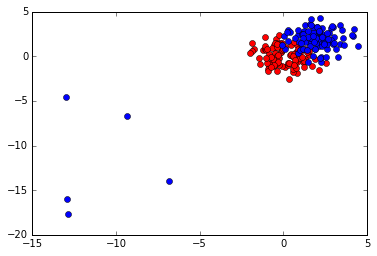

In [304]:
a = X[data[:, 0] < 0]
b = X[data[:, 0] > 0]

plt.plot(a[:, :1], a[:, 1:], 'ro', b[:, :1], b[:, 1:], 'bo')
plt.show()

In [305]:
from math import exp

def gradient_descent(X, y, k=0.1, eps=1e-5, C=10.0, start_w=None, max_iters=10000, regularization=False):
    l, w_length = X.shape
    w = start_w or np.empty(w_length)

    iter_n = 0
    stop_by_iter_number = False
    stop_by_step_length = False
    
    while not any((stop_by_iter_number, stop_by_step_length,)):
        w_new = np.array(w)
        
        for j in xrange(w_length):
            sum_ = 0.0
            for i in xrange(l):
                denom = 1 + exp(-1.0 * y[i] * sum(np.multiply(w, X[i])))
                val = y[i] * X[i][j] * (1.0 - (1.0 / denom))
                sum_ += val
            
            w_new[j] += (k / l) * sum_
            
            if regularization:
                w_new[j] -= k * C * w[j]
                
        iter_n += 1
        stop_by_iter_number = iter_n >= max_iters
        distance = np.linalg.norm(w_new - w, ord=2)
        stop_by_step_length = distance < eps
        w = w_new
        
    if stop_by_iter_number:
        print 'Stopped because of iterations count'
    elif stop_by_step_length:
        print 'Stopped because of EPS step reached. Iters: {}'.format(iter_n)
    else:
        print 'Stopped because fuck you'
        
    return w

In [310]:
w_nonreg = gradient_descent(X, y, regularization=False)
w_reg = gradient_descent(X, y, regularization=True)

def get_score(x, w):
    denom = 1 + exp(-1.0 * sum(np.multiply(w, x)))
    return 1.0 / denom

scores_nonreg = [get_score(x, w_nonreg) for x in X]
scores_reg = [get_score(x, w_reg) for x in X]

total_nonreg = roc_auc_score(y, scores_nonreg)
total_reg = roc_auc_score(y, scores_reg)

assignment_data = '{nonreg:.3f} {reg:.3f}'.format(nonreg=total_nonreg, reg=total_reg)
print assignment_data                                    
with open('assignments/3_1.txt', 'w') as f:
    f.write(assignment_data)

Stopped because of EPS step reached. Iters: 244
Stopped because of EPS step reached. Iters: 9
0.927 0.936
